In [33]:
from discopy.symmetric import Ty 

# Ty forms a free monoid, where Ty() is the unit and '@' is the product!

print(Ty('sentence', 'qubit'))

sentence @ qubit


In [34]:
# define some types, the '*' unpacks the list
egg, white, yolk, sugar, stuff = Ty(*['egg', 'white', 'yolk', 'sugar', 'stuff'])

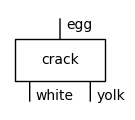

In [35]:
from discopy.symmetric import Box 

# we can now draw boxes using these new types, where cod = codomain = output, dom = domain = input 
crack = Box(name= 'crack', dom = egg, cod = white @ yolk)

# and we can draw this box 
crack.draw(figsize=(1,1))


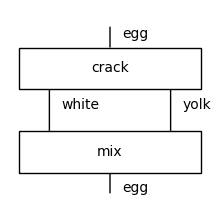

In [36]:
# we can compose diagrams like this: 
mix = Box(name = 'mix', dom = white @ yolk, cod = egg)

# compose equations, we can use '@' to place them side by side, or we can use >> ('then')
crackMix = crack >> mix 

crackMix.draw(figsize = (2,2))

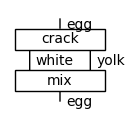

In [37]:
from discopy.symmetric import Id

# we also have an identity
idTensor = Id(egg) >> crackMix
idTensor.draw(figsize = (1,1))

In [38]:
# we can also use the lambda method to, e.g., merge two types (indep of type) together 
merge = lambda x: Box('merge', x @ x, x)

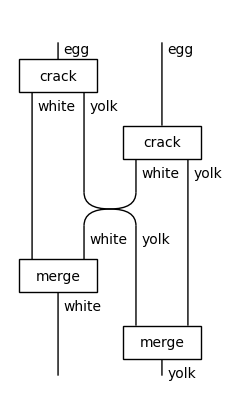

In [39]:
# let's use this to construct a diagram that cracks two eggs 
from discopy.symmetric import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> white @ Swap(yolk, white) @ yolk\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(2, 4))

In [40]:
# now, we can introduce diagrams
from discopy.symmetric import Diagram

assert crack_two_eggs == Diagram.decode(
    dom = egg @ egg, boxes_and_offsets = [
        (crack,                 0),
        (crack,                 2), 
        (Swap(yolk, white),     1), 
        (merge(white),          0), 
        (merge(yolk),           1)
    ]
)

# offsets: how many lines are on its left after the operation? box_and_offsets is a list of the box (crack,   offset), (...), ...
# we can get these values by just calling diagram.offsets e.g.
crack_two_eggs.offsets


[0, 2, 1, 0, 1]

In [41]:
# The diagram is the main data strucutre of DisCoPy!! 
# The Functor is its main algorithm. Functor is initialised by two mappings
# ob:   maps objects (types of len() = 1) to types      TRANSFORMS TYPES
# ar:  maps boxes to diagrams                           TRANSFORMS BOXES

# We use the functor as follows. Functor(diagram) = otherDiagram
# An example 

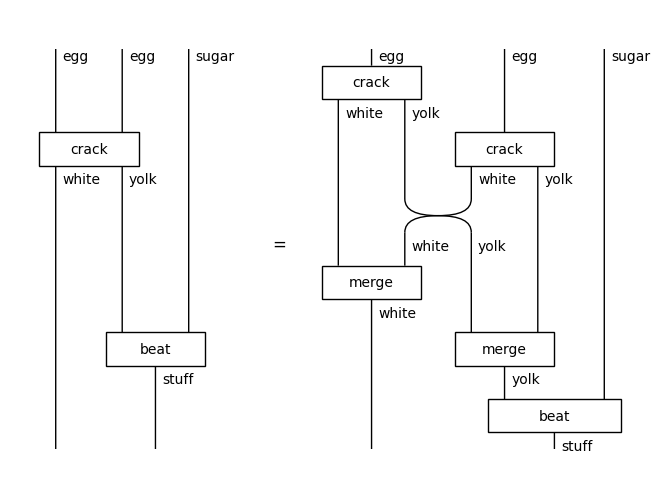

In [43]:
from discopy.symmetric import Functor

# let's create an array that we later want to substitute
crack2Eggs = Box('crack', egg @ egg, white @ yolk)

# define a functor that replaces the crack2Eggs method with the crack_two_eggs method defined earlier 
substitute2Eggs = Functor(
    ob = lambda x: x, 
    ar = {crack2Eggs: crack_two_eggs, beat: beat}
)

# create a new diagram for explaining purposes 

beat = Box('beat', yolk @ sugar, stuff)

crack2_then_beat = crack2Eggs @ Id(sugar) >> Id(white) @ beat

otherDiagram = substitute2Eggs(crack2_then_beat)

from discopy.drawing import Equation

Equation(crack2_then_beat, otherDiagram).draw()

Tensors

In [45]:
# tensors are boxes 

from discopy.tensor import Dim, Tensor

# dim is a subclass of Ty, Tensor is a subclass of Box
# Every tensor has an array method: 

matrix = Tensor([0,1,1,0], Dim(2), Dim(2))
matrix.array


array([[0, 1],
       [1, 0]])

In [ ]:
# matrix multiplication is done using the '>>'
matrix2 = Tensor([0,1,1,0], Dim(2), Dim(2))

matrix >> matrix2